In [1]:
# !pip install danbi

In [25]:
import danbi as bi
import numpy as np

# AND / OR / XOR 연산 함수

In [3]:
# AND 연산
def exAnd(x1, x2):
    if x1 == x2 == 1:
        return 1
    else:
        return 0

In [4]:
bi.showAsCols(
    exAnd(0, 0), exAnd(0, 1), exAnd(1, 0), exAnd(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [5]:
# OR 연산
def exOr(x1, x2):
    if x1 == x2 == 0:
        return 0
    else:
        return 1

In [6]:
bi.showAsCols(
    exOr(0, 0), exOr(0, 1), exOr(1, 0), exOr(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [7]:
# XOR 연산
def exXor(x1, x2):
    if x1 == x2:
        return 0
    else:
        return 1

In [8]:
bi.showAsCols(
    exXor(0, 0), exXor(0, 1), exXor(1, 0), exXor(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# Perceptron Cell

In [359]:
def cell(x1, x2, w1=0.5, w2=0.5, bias=0.5):
    weightSum = x1*w1 + x2*w2 - bias
    return 0 if weightSum <= 0 else 1

In [10]:
BIAS1 = 0.6
BIAS2 = 0.4
bi.showAsCols(
    "AND", "OR",
    cell(0, 0, bias=BIAS1), cell(0, 0, bias=BIAS2),
    cell(0, 1, bias=BIAS1), cell(0, 1, bias=BIAS2),
    cell(1, 0, bias=BIAS1), cell(1, 0, bias=BIAS2),
    cell(1, 1, bias=BIAS1), cell(1, 1, bias=BIAS2),
    colSize=2, width="30%"
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# Learning

In [343]:
datas = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
labels = [0, 1, 1, 1]

In [351]:
class Learning(object):
    def __init__(self, learningRate=0.1):
        self.learningRate = learningRate
        self.bias = 0.5
        self.w = np.random.rand(2)
        self.errors = []
        
    def fit(self, data, label):
        predicted = self.prediction(data)
        error = self._loss(predicted, label)
        self.errors.append(error)
        optimize = self._optimizer(self.learningRate,  error)
    
    def _hypothesis(self, data, weight, bias):
        return np.matmul(data, weight) - bias
            
    def _loss(self, predicted, label):
        errors = 0
        for label, pred in zip(label, predicted):
            errors += label - pred
        return errors / len(predicted)
    
    def _optimizer(self, learningRate, error):
        update = learningRate * error
        self.w += update
    
    def prediction(self, data):
        production = self._hypothesis(data, self.w, self.bias)
        return np.where(production <= 0, 0, 1)

In [352]:
learning = Learning(0.01)
print(learning.w)

[0.85032939 0.20815365]


In [353]:
learning.prediction(np.array(datas))

array([0, 0, 1, 1])

In [354]:
for _ in range(200):
    learning.fit(np.array(datas), np.array(labels))

In [355]:
print(learning.w)

[1.14282939 0.50065365]


In [356]:
learning.prediction(np.array(datas))

array([0, 1, 1, 1])

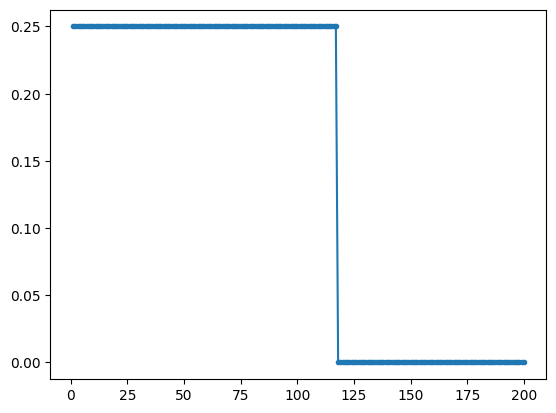

In [357]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(learning.errors)+1), learning.errors, marker=".")
plt.show()

# 마빈 민스키의 “퍼셉트론 한계” (1969년) 극복

In [360]:
# AND
bi.showAsCols(
    cell(0, 0, w1=0.5, w2=0.5, bias=0.5),
    cell(0, 1, w1=0.5, w2=0.5, bias=0.5),
    cell(1, 0, w1=0.5, w2=0.5, bias=0.5),
    cell(1, 1, w1=0.5, w2=0.5, bias=0.5),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [361]:
# OR
bi.showAsCols(
    cell(0, 0, w1=0.5, w2=0.5, bias=0.4),
    cell(0, 1, w1=0.5, w2=0.5, bias=0.4),
    cell(1, 0, w1=0.5, w2=0.5, bias=0.4),
    cell(1, 1, w1=0.5, w2=0.5, bias=0.4),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [362]:
# NAND
bi.showAsCols(
    cell(0, 0, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(0, 1, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(1, 0, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(1, 1, w1=-0.5, w2=-0.5, bias=-0.6),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [364]:
def cellXOR(x1, x2):
    resultNAND = cell(x1, x2, w1=-0.5, w2=-0.5, bias=-0.6)
    resultOR   = cell(x1, x2, w1=0.5, w2=0.5, bias=0.4)
    return cell(resultNAND, resultOR, w1=0.5, w2=0.5, bias=0.5)

In [365]:
# XOR
bi.showAsCols(
    cellXOR(0, 0),
    cellXOR(0, 1),
    cellXOR(1, 0),
    cellXOR(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…